## Students Perfomance Project

### The project understands how the perfomance of a student is affected by diffirent variables.

### Import Libraries and data

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, Normalizer,RobustScaler,PolynomialFeatures, MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [51]:
stud = pd.read_csv('/content/student-por.csv')
stud.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12


In [ ]:
## Number of columns and rows
stud.shape

(649, 33)

* 649 Columns and 33 Rows

In [ ]:
## Check columns present in the data file
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
## checking for missing values per column
stud.isnull().sum()


,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


* No missing values in the each column

In [ ]:
## check for duplicated values
stud.duplicated().sum()

np.int64(0)

* No duplicates

In [ ]:
## check for datatypes
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [ ]:
## Check the number of unique value in each column
stud.nunique()

,0
school,2
sex,2
age,8
address,2
famsize,2
Pstatus,2
Medu,5
Fedu,5
Mjob,5
Fjob,5


In [ ]:
## Check various categories present in the different categories columns
print('categories in age:',stud['age'].unique())
print('categories in Medu:',stud['Medu'].unique())
print('categories in school:',stud['school'].unique())
print('categories in sex:',stud['sex'].unique())
print('categories in address:',stud['address'].unique())
print('categories in famsize:',stud['famsize'].unique())
print('categories in Pstatus:',stud['Pstatus'].unique())
print('categories in Mjob:',stud['Mjob'].unique())
print('categories in Fjob:',stud['Fjob'].unique())
print('categories in reason:',stud['reason'].unique())
print('categories in guardian:',stud['guardian'].unique())
print('categories in traveltime:',stud['traveltime'].unique())
print('categories in studytime:',stud['studytime'].unique())
print('categories in failures:',stud['failures'].unique())
print('categories in schoolsup:',stud['schoolsup'].unique())
print('categories in famsup:',stud['famsup'].unique())
print('categories in paid:',stud['paid'].unique())
print('categories in activities:',stud['activities'].unique())
print('categories in nursery:',stud['nursery'].unique())
print('categories in higher:',stud['higher'].unique())
print('categories in internet:',stud['internet'].unique())
print('categories in romantic:',stud['romantic'].unique())
print('categories in famrel:',stud['famrel'].unique())
print('categories in freetime:',stud['freetime'].unique())
print('categories in goout:',stud['goout'].unique())
print('categories in Dalc:',stud['Dalc'].unique())
print('categories in Walc:',stud['Walc'].unique())
print('categories in health:',stud['health'].unique())
print('categories in absences:',stud['absences'].unique())
print('categories in G1:',stud['G1'].unique())
print('categories in G2:',stud['G2'].unique())
print('categories in G3:',stud['G3'].unique())

categories in age: [18 17 15 16 19 22 20 21]
categories in Medu: [4 1 3 2 0]
categories in school: ['GP' 'MS']
categories in sex: ['F' 'M']
categories in address: ['U' 'R']
categories in famsize: ['GT3' 'LE3']
categories in Pstatus: ['A' 'T']
categories in Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
categories in Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
categories in reason: ['course' 'other' 'home' 'reputation']
categories in guardian: ['mother' 'father' 'other']
categories in traveltime: [2 1 3 4]
categories in studytime: [2 3 1 4]
categories in failures: [0 3 1 2]
categories in schoolsup: ['yes' 'no']
categories in famsup: ['no' 'yes']
categories in paid: ['no' 'yes']
categories in activities: ['no' 'yes']
categories in nursery: ['yes' 'no']
categories in higher: ['yes' 'no']
categories in internet: ['no' 'yes']
categories in romantic: ['no' 'yes']
categories in famrel: [4 5 3 1 2]
categories in freetime: [3 2 4 1 5]
categories in goout: [4 3 2 1 5]
catego

In [ ]:
## Data statistics
stud.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


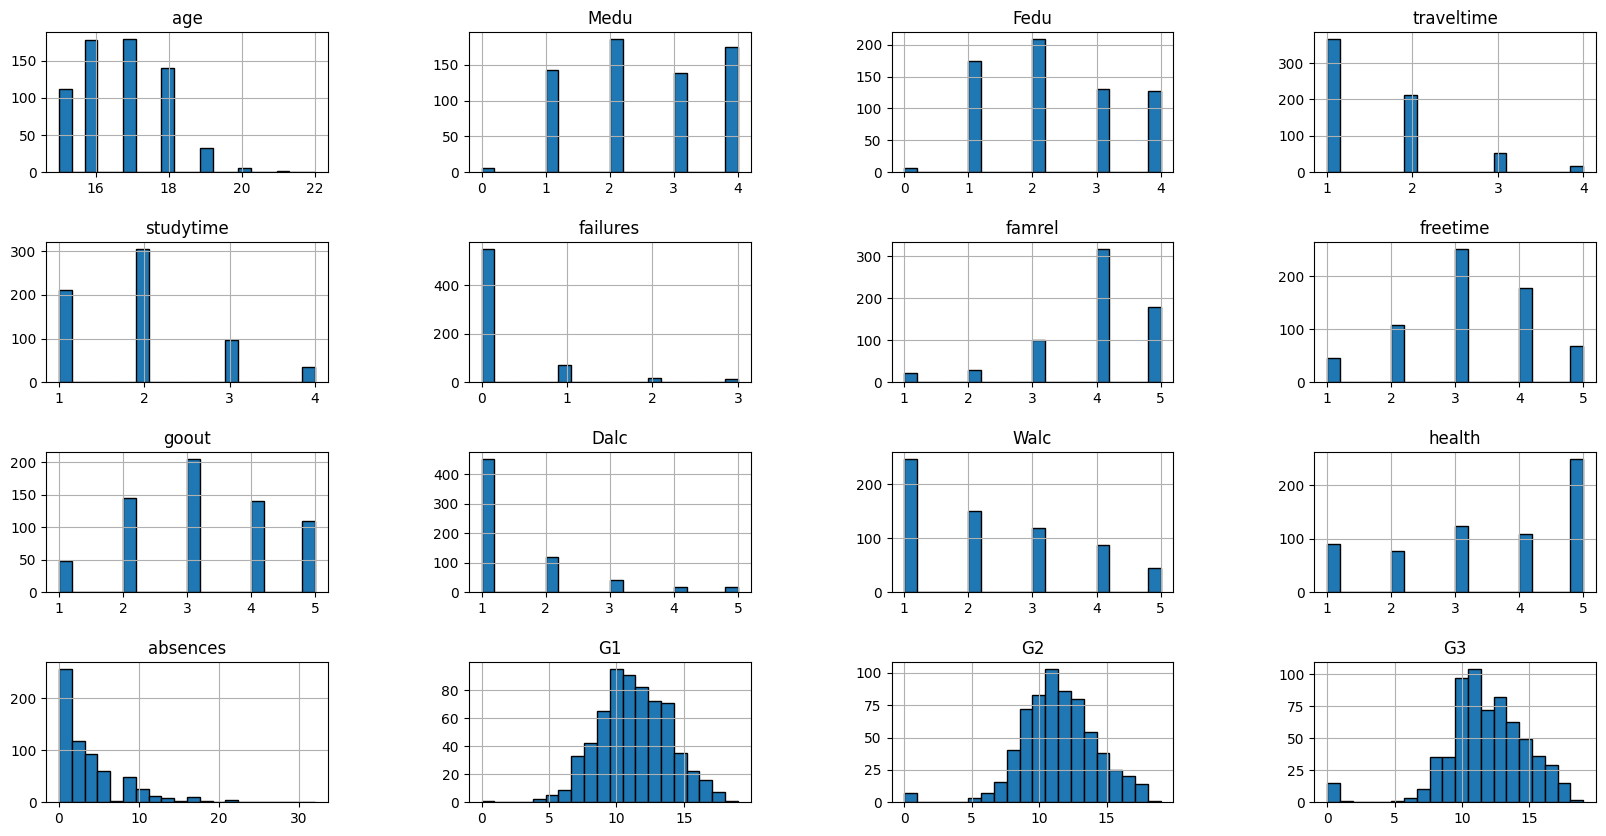

In [ ]:
## Histogram
stud.hist(figsize=(20,10),bins=20, edgecolor='black')
plt.subplots_adjust(hspace=0.5,wspace=0.5)

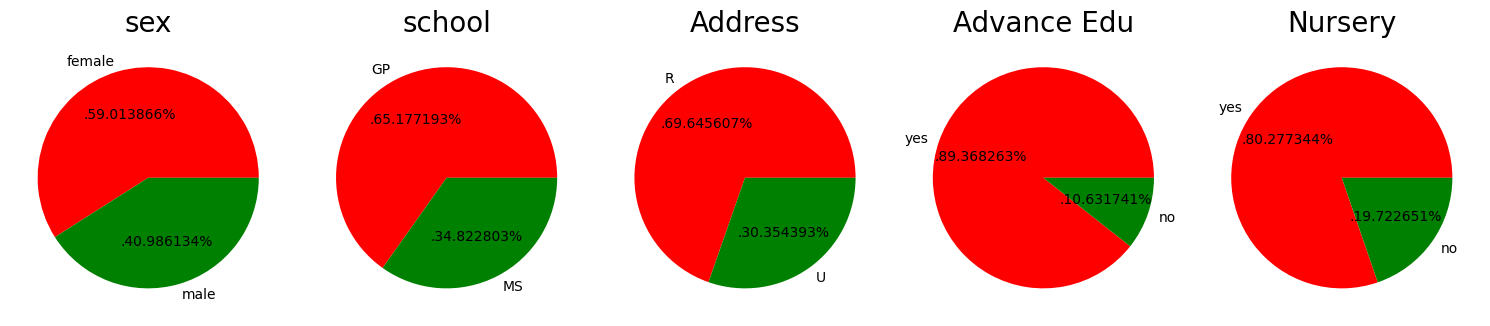

In [ ]:
plt.rcParams['figure.figsize'] = (15,5)

plt.subplot(1,5,1)
size = stud['sex'].value_counts()
labels = 'female' , 'male'
color = ['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('sex',fontsize = 20)
plt.axis('off')

plt.subplot(1,5,2)
size = stud['school'].value_counts()
labels = 'GP' , 'MS'
color = ['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('school',fontsize = 20)
plt.axis('off')

plt.subplot(1,5,3)
size = stud['address'].value_counts()
labels = 'R' , 'U'
color = ['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Address',fontsize = 20)
plt.axis('off')

plt.subplot(1,5,4)
size = stud['higher'].value_counts()
labels = 'yes' , 'no'
color = ['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Advance Edu',fontsize = 20)
plt.axis('off')

plt.subplot(1,5,5)
size = stud['nursery'].value_counts()
labels = 'yes' , 'no'
color = ['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Nursery',fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()
plt.show()

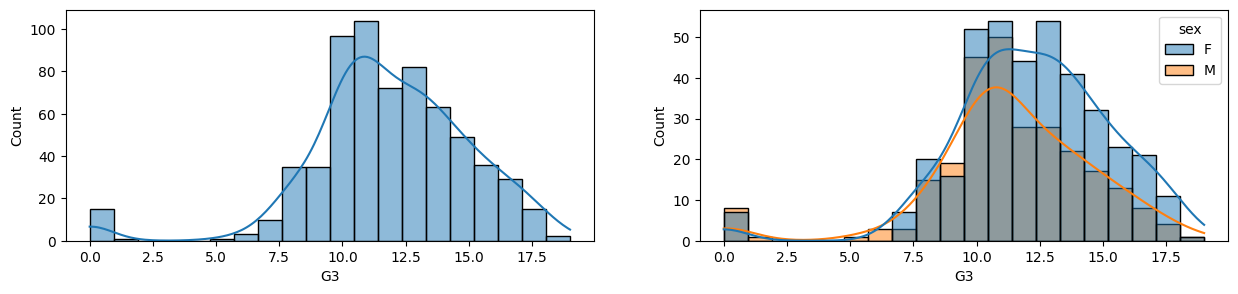

In [ ]:
fig , axs = plt.subplots(1,2,figsize=(15,3))
plt.subplot(121)
sns.histplot(data= stud, x='G3',bins=20, kde=True)
plt.subplot(122)
sns.histplot(data= stud, x='G3',bins=20, kde=True, hue='sex')
plt.show()

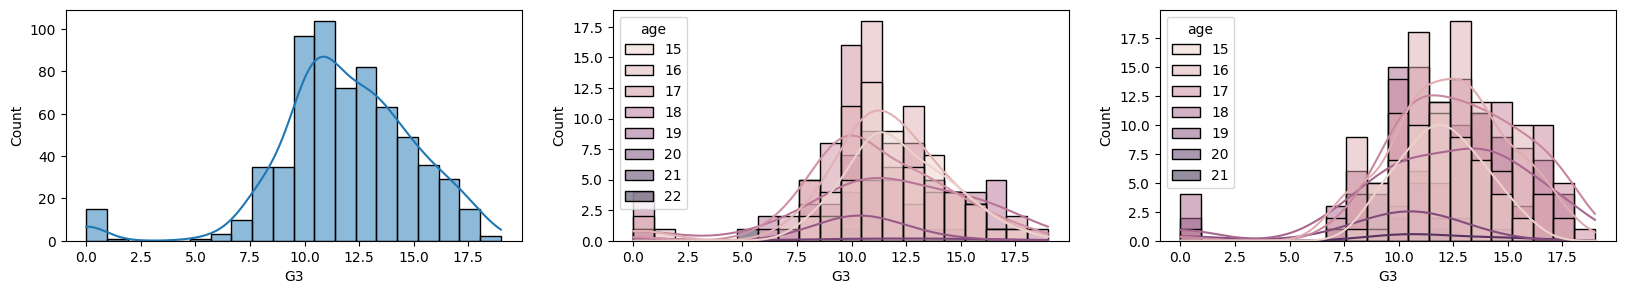

In [ ]:
fig , axs = plt.subplots(1,3,figsize=(20,3))
plt.subplot(131)
sns.histplot(data= stud, x='G3',bins=20, kde=True)
plt.subplot(132)
sns.histplot(data= stud[stud.sex=='M'], x='G3',bins=20, kde=True, hue='age')
plt.subplot(133)
sns.histplot(data= stud[stud.sex=='F'], x='G3',bins=20, kde=True, hue='age')
plt.show()

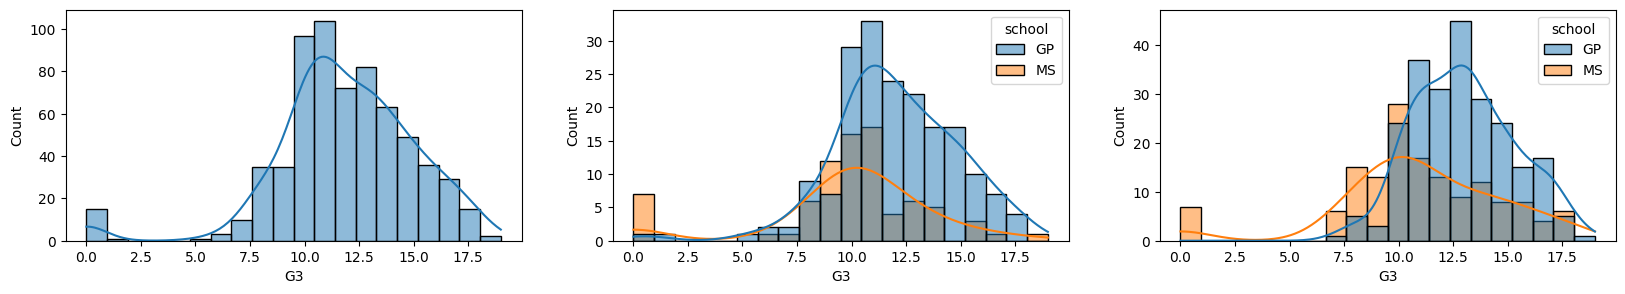

In [ ]:
fig , axs = plt.subplots(1,3,figsize=(20,3))
plt.subplot(131)
sns.histplot(data= stud, x='G3',bins=20, kde=True)
plt.subplot(132)
sns.histplot(data= stud[stud.sex=='M'], x='G3',bins=20, kde=True, hue='school')
plt.subplot(133)
sns.histplot(data= stud[stud.sex=='F'], x='G3',bins=20, kde=True, hue='school')
plt.show()

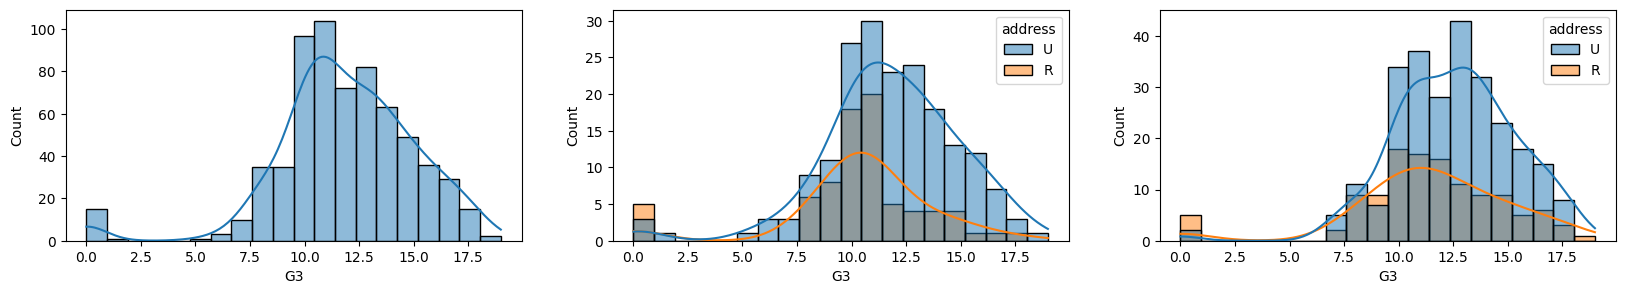

In [ ]:
fig , axs = plt.subplots(1,3,figsize=(20,3))
plt.subplot(131)
sns.histplot(data= stud, x='G3',bins=20, kde=True)
plt.subplot(132)
sns.histplot(data= stud[stud.sex=='M'], x='G3',bins=20, kde=True, hue='address')
plt.subplot(133)
sns.histplot(data= stud[stud.sex=='F'], x='G3',bins=20, kde=True, hue='address')
plt.show()

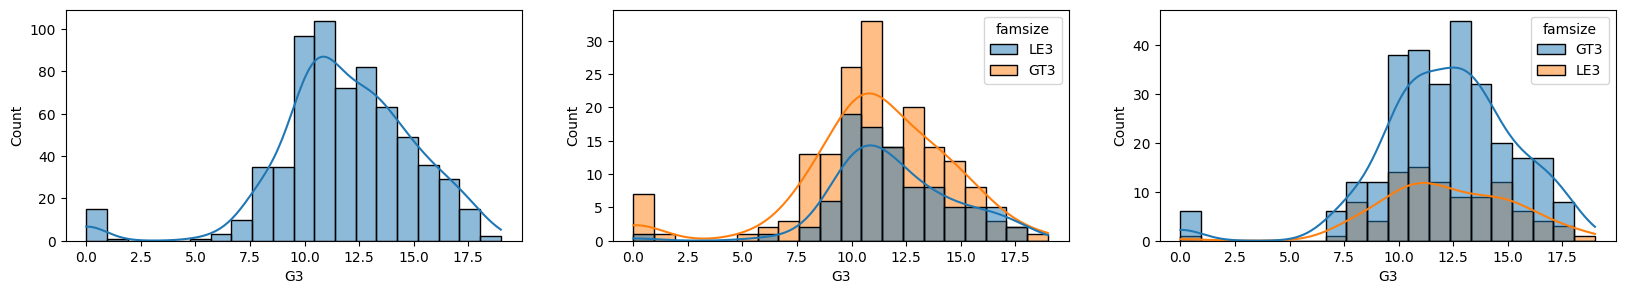

In [ ]:
fig , axs = plt.subplots(1,3,figsize=(20,3))
plt.subplot(131)
sns.histplot(data= stud, x='G3',bins=20, kde=True)
plt.subplot(132)
sns.histplot(data= stud[stud.sex=='M'], x='G3',bins=20, kde=True, hue='famsize')
plt.subplot(133)
sns.histplot(data= stud[stud.sex=='F'], x='G3',bins=20, kde=True, hue='famsize')
plt.show()

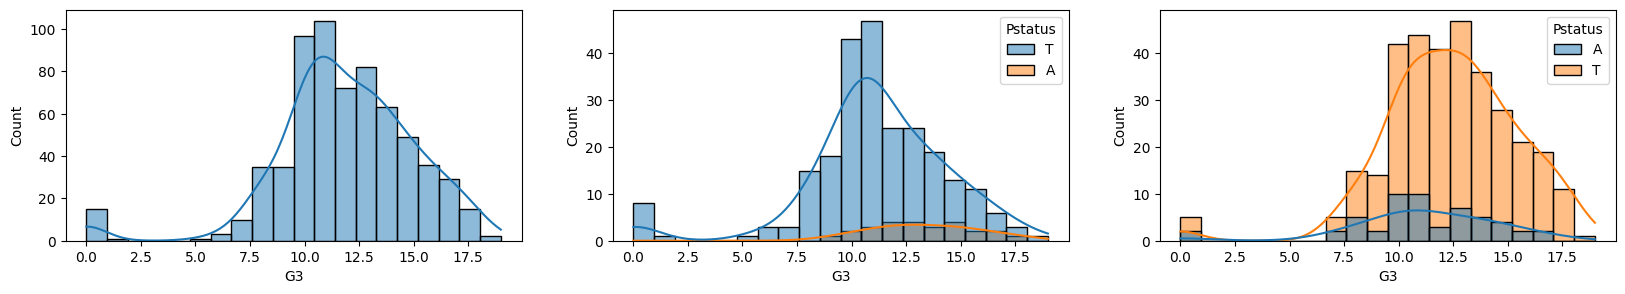

In [ ]:
fig , axs = plt.subplots(1,3,figsize=(20,3))
plt.subplot(131)
sns.histplot(data= stud, x='G3',bins=20, kde=True)
plt.subplot(132)
sns.histplot(data= stud[stud.sex=='M'], x='G3',bins=20, kde=True, hue='Pstatus')
plt.subplot(133)
sns.histplot(data= stud[stud.sex=='F'], x='G3',bins=20, kde=True, hue='Pstatus')
plt.show()

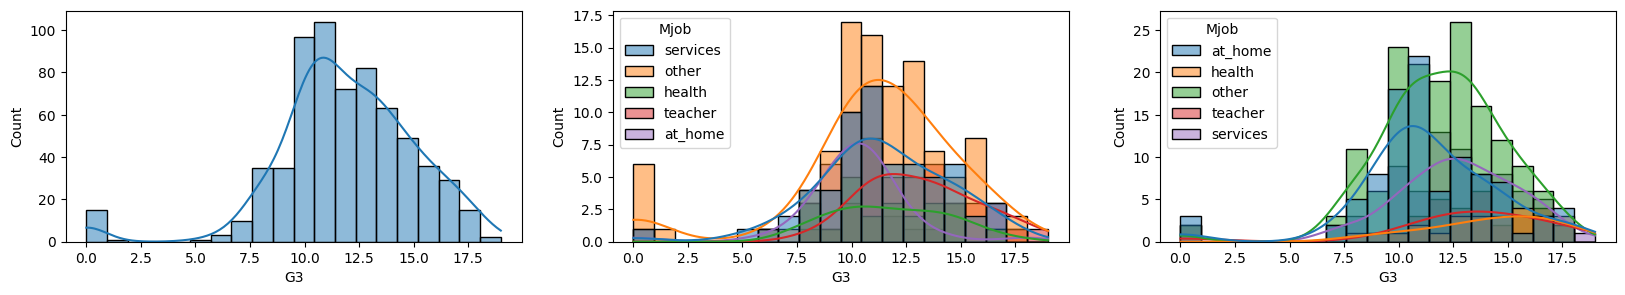

In [ ]:
fig , axs = plt.subplots(1,3,figsize=(20,3))
plt.subplot(131)
sns.histplot(data= stud, x='G3',bins=20, kde=True)
plt.subplot(132)
sns.histplot(data= stud[stud.sex=='M'], x='G3',bins=20, kde=True, hue='Mjob')
plt.subplot(133)
sns.histplot(data= stud[stud.sex=='F'], x='G3',bins=20, kde=True, hue='Mjob')
plt.show()

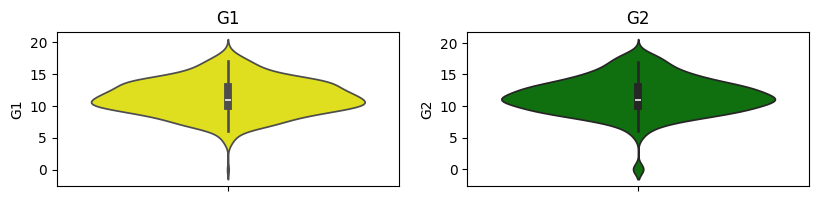

In [ ]:
plt.figure(figsize=(15,2))
plt.subplot(1,3,1)
plt.title('G1')
sns.violinplot(data=stud, y='G1', color='yellow')
plt.subplot(1,3,2)
plt.title('G2')
sns.violinplot(data=stud, y='G2', color= 'green')
plt.show()

In [ ]:
gmean = stud.groupby('sex')[['G1','G2','G3']].mean()
g_mean = pd.DataFrame(gmean)

g_mean

,G1,G2,G3
sex,,,
F,11.637076,11.822454,12.253264
M,11.056391,11.206767,11.406015


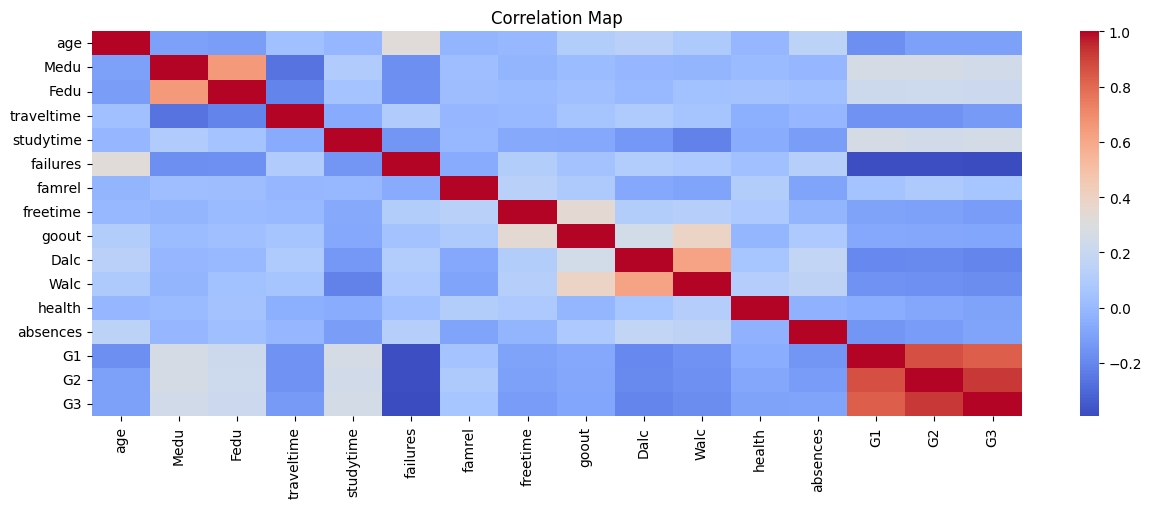

In [ ]:
## Plot Heatmap to display Correlation
sns.heatmap(stud.corr(numeric_only=True), cmap='coolwarm')
plt.title('Correlation Map')
plt.show()

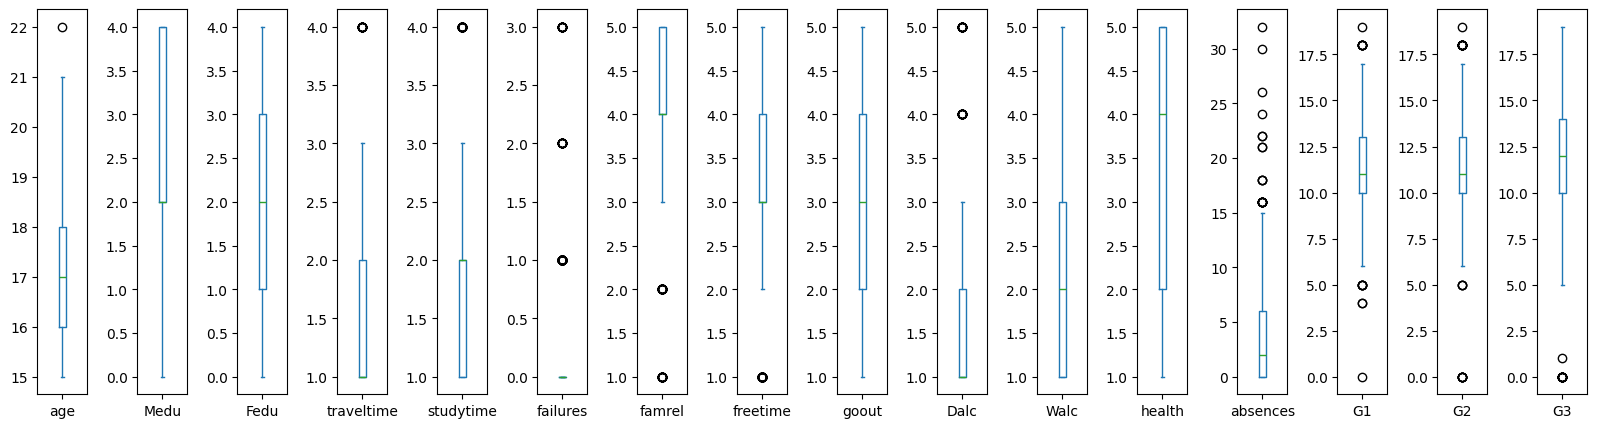

In [ ]:
## Boxplot to identify Outliers
stud.plot(kind='box',subplots= True, sharey=False, figsize=(20,5))
plt.subplots_adjust(wspace=1)

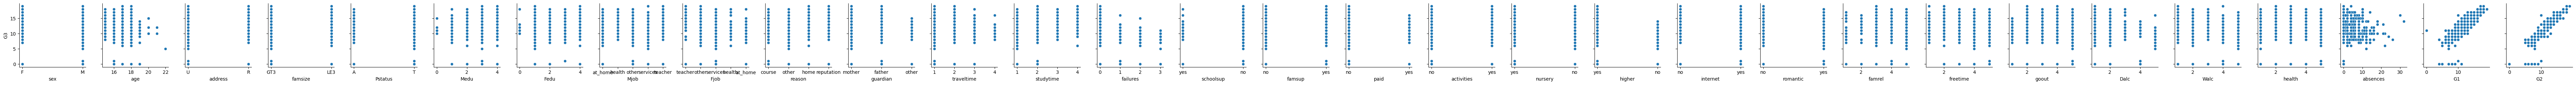

In [ ]:
## Relatioship between variables
sns.pairplot(data=stud,
             x_vars=stud.columns[1:32],
             y_vars='G3')

### Preprocessing

In [52]:
## Data Encoding
le = LabelEncoder()
columns_to_encode = ['school', 'sex','address', 'famsize','Pstatus','Mjob', 'Fjob', 'reason','guardian','schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic']

for column in columns_to_encode:
  stud[column] = le.fit_transform(stud[column])


In [53]:
## Define X and Y
# Scale the data
scaler = MinMaxScaler()
X = scaler.fit_transform(stud.drop(['G3'],axis=1))
X = pd.DataFrame(X,columns=stud.drop(['G3'],axis=1).columns)
y = stud['G3']

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((454, 32), (195, 32), (454,), (195,))

### Modelling

In [69]:
## Fit a Model
line= LinearRegression()
line.fit(X_train,y_train)
y_hart = line.predict(X_test)

r2_score(y_hart ,y_test)

0.8616716967200337

In [56]:
## Cross validated
score = cross_val_score(LinearRegression(),X_train,y_train,cv=5,scoring='r2')
print(score,score.mean())

[0.76407291 0.73847278 0.84814485 0.88081667 0.87872827] 0.8220470939661345


In [57]:
## Ridge regression
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(Ridge(alpha=0.1))
scores = cross_val_score(pipe,X_train,y_train,cv=5,scoring='r2')
print(scores,scores.mean())

[0.76353273 0.73746566 0.84613775 0.88246901 0.88122404] 0.8221658384186533


In [100]:
## Lasso regression
pipe = make_pipeline(PolynomialFeatures(degree=1),
                          StandardScaler(), Lasso(alpha=1e-1))
scores = cross_val_score(pipe,X_train,y_train,cv=5,scoring='r2')
print(scores,scores.mean())

[0.78666042 0.74792202 0.84145789 0.88935388 0.90173411] 0.8334256639002751


In [93]:
# Another regression model
pipe = make_pipeline(PolynomialFeatures(degree=1),RandomForestRegressor())
scores = cross_val_score(pipe,X_train,y_train,cv=5,scoring='r2')
print(scores,scores.mean())

[0.79697232 0.76571157 0.85980498 0.81178815 0.88264506] 0.8233844152346335


In [74]:
from sklearn.tree import DecisionTreeClassifier
pipe = make_pipeline(PolynomialFeatures(degree=1),DecisionTreeClassifier())
scores = cross_val_score(pipe,X_train,y_train,cv=5,scoring='r2')
print(scores,scores.mean())

[0.48041887 0.5033715  0.65997198 0.68065911 0.71993495] 0.6088712781322512


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [106]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 86.99


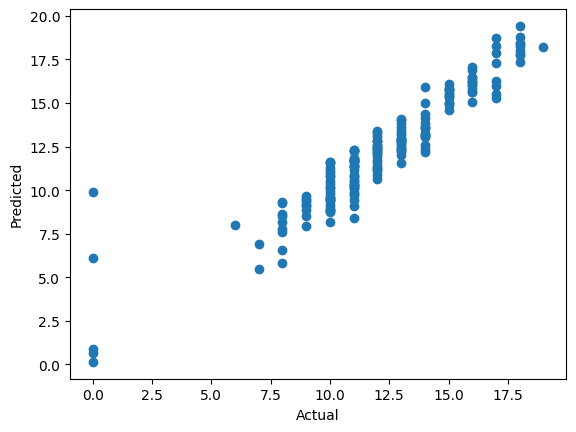

In [107]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

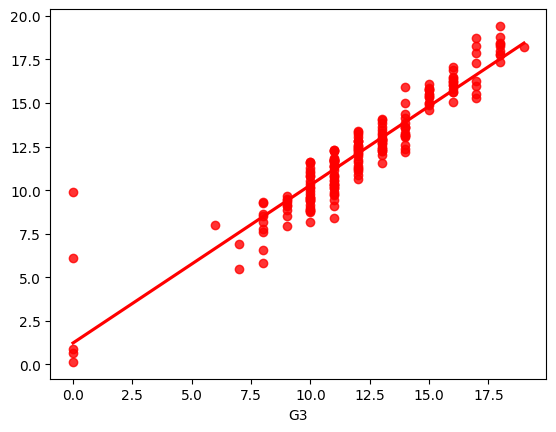

In [108]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [109]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
636,19,18.189640,0.810360
220,12,11.626746,0.373254
594,18,18.282493,-0.282493
429,11,10.896269,0.103731
72,11,11.684121,-0.684121
...,...,...,...
310,10,9.606799,0.393201
256,8,9.294727,-1.294727
137,11,11.644284,-0.644284
274,10,9.551826,0.448174
